In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from data import transforms
import torch

In [2]:
file ='/media/student1/Backup Plus/calgary/Train/e14110s3_P59904.7.npy'
data = np.load(file)
kspace = torch.from_numpy(data)[90,:,:]
kspace_shift = transforms.ifftshift(kspace)

kspace_shift.shape

torch.Size([256, 256, 2])

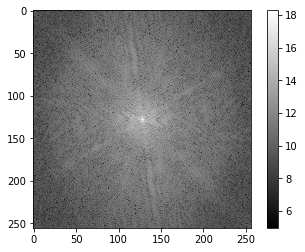

In [3]:
plt.imshow(torch.log(transforms.complex_abs(kspace_shift)+1e-7),cmap='gray')
plt.colorbar()

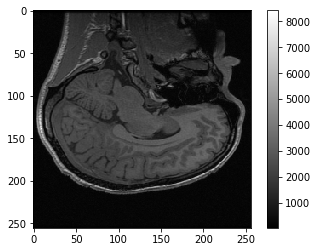

In [4]:
target = torch.ifft(kspace_shift,2)
plt.imshow(transforms.complex_abs(target),cmap='gray')
plt.colorbar()

In [5]:
from common.subsample import MaskFunc
use_seed =True
seed = None if not use_seed else tuple(map(ord, file))
mask = MaskFunc([0.08], [2])
masked_kspace, mask = transforms.apply_mask(kspace_shift.float(),mask,seed)

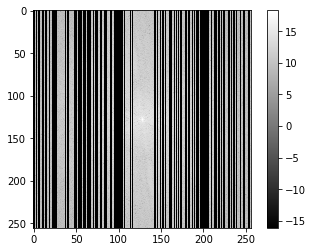

In [6]:
plt.imshow(torch.log(transforms.complex_abs(masked_kspace)+1e-7),cmap='gray')
plt.colorbar()

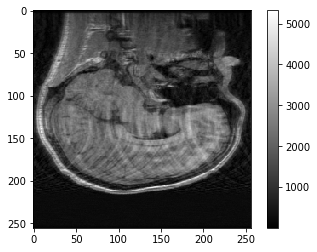

In [7]:
us_image = torch.ifft(masked_kspace,2,normalized=False)
plt.imshow(transforms.complex_abs(us_image),cmap='gray')
plt.colorbar()

In [8]:
us_image, mean, std = transforms.normalize_instance(us_image, eps=1e-11)

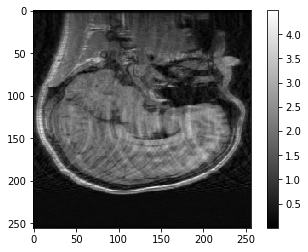

In [9]:
plt.imshow(transforms.complex_abs(us_image),cmap='gray')
plt.colorbar()

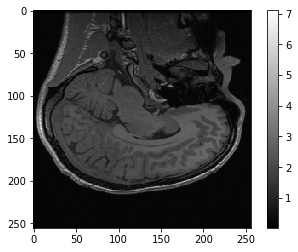

In [11]:
target = transforms.normalize(target, mean, std, eps=1e-11)
plt.imshow(transforms.complex_abs(target),cmap='gray')
plt.colorbar()

In [ ]:
file_multi = '/media/student1/Backup Plus/calgary/Multi-channel/12-channel/Train/e14089s3_P53248.7.h5'
data_multi  = h5py.File(file_multi,'r')

In [ ]:
list(data_multi.keys())

In [ ]:
data_multi['kspace']